In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from sb3_contrib import TQC

In [2]:
env = gym.make("Pendulum-v1", render_mode="rgb_array")

In [3]:
def save_frames_as_gif(frames, path="./", filename="gym_animation.gif"):
    plt.figure(
        figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72
    )
    patch = plt.imshow(frames[0])
    plt.axis("off")

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(
        plt.gcf(), animate, frames=len(frames), interval=50
    )
    anim.save(path + filename, writer="imagemagick", fps=60)

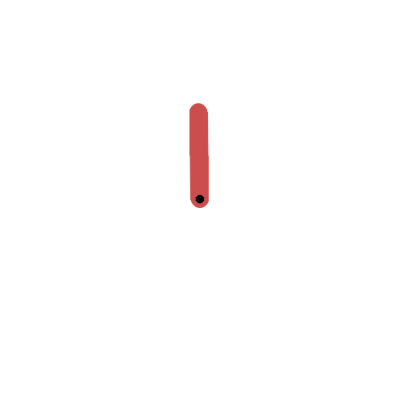

In [4]:
model = TQC.load("models/tqc_pendulum")

obs, _ = env.reset()
frames = []
for i in range(1000):
    frames.append(env.render())
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, _ = env.reset()

save_frames_as_gif(frames, "./gifs/", "tqc_pendulum.gif")